# Project 3: `Web API's` & `Classification`
---
_Gabriel Perez Prieto_  

### 02_Data Cleaning, EDA and Preprocessing
---

#### Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Magic command and plot style - matplotlib.pyplot
%matplotlib inline
plt.style.use('seaborn-darkgrid')

    # Do not display future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Load data

In [33]:
df = pd.read_csv('./data/reddit.csv')

In [34]:
# Check first 5 rows
df.head()

,author,body,score,subreddit,created_date
0,ThisIsMyRental,"My, my, my, you've outdone yourself friend! It...",1,vegan,2019-10-17 20:01:40
1,NorthernTurnip,Yeah that drives me crazy,1,vegan,2019-10-17 20:01:32
2,SkarKrow,London is amazing.\n\nThough if you visit the ...,1,vegan,2019-10-17 20:00:57
3,Breaking-finch,Because you took their land from them and disp...,0,vegan,2019-10-17 19:59:50
4,beariesad,"ohh no shame in it at all! it's good for you, ...",2,vegan,2019-10-17 19:59:21


#### Feature Engineering

In [35]:
# Create 'target' for classification
df['target'] = df['subreddit'].map({'vegan': 1, 'vegetarian': 0})

In [36]:
# Create function to tokenize 'body'
def tokenizer(x):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(x)

In [37]:
# Create new column with Tokens
df['tokens'] = df['body'].map(tokenizer)

In [38]:
# Create 'average_word_len' feature
df['avg_word_len'] = df['tokens'].map(lambda x: np.mean([len(word) for word in x]))

/Users/gabrielperezprieto/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gabrielperezprieto/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [39]:
# Create 'num_words' feature
df['num_words'] = df['tokens'].map(len)

#### Data Cleaning

In [40]:
# Check shape
df.shape

(10000, 9)

In [41]:
# Check fot null values
df.isnull().mean()

author          0.0000
body            0.0000
score           0.0000
subreddit       0.0000
created_date    0.0000
target          0.0000
tokens          0.0000
avg_word_len    0.0023
num_words       0.0000
dtype: float64

In [42]:
# Check Null Values - Emojis!
df[df.isna().any(axis=1)]

,author,body,score,subreddit,created_date,target,tokens,avg_word_len,num_words
134,N_edwards23,❤,3,vegan,2019-10-17 18:53:38,1,[],NaN,0
259,greenteasweetpea,🏃💨,3,vegan,2019-10-17 18:01:42,1,[],NaN,0
572,nwanda27,?????????????????,1,vegan,2019-10-17 15:28:53,1,[],NaN,0
1051,vegansammy,😍😍😍😍,1,vegan,2019-10-17 10:06:19,1,[],NaN,0
1364,airecl,🤣,1,vegan,2019-10-17 04:36:20,1,[],NaN,0
1450,itsizzydarling,😂,1,vegan,2019-10-17 03:27:44,1,[],NaN,0
1455,itsizzydarling,☝🏽🙌🏽,1,vegan,2019-10-17 03:26:09,1,[],NaN,0
1972,ttrockwood,💪🌱💪,1,vegan,2019-10-16 23:25:40,1,[],NaN,0
2312,RX_queen,🤘,1,vegan,2019-10-16 20:47:27,1,[],NaN,0
3015,shinepurple,🤮,1,vegan,2019-10-16 16:25:35,1,[],NaN,0


In [43]:
# Drop Rows with no body or with emoticons
df.dropna(axis=0, inplace=True)

In [44]:
# Check shape to make sure Nan were removed
df.shape

(9977, 9)

In [45]:
# Check variable types
df.dtypes

author           object
body             object
score             int64
subreddit        object
created_date     object
target            int64
tokens           object
avg_word_len    float64
num_words         int64
dtype: object

In [46]:
# Check for duplicate values
df[['body', 'subreddit']].duplicated(keep='first').value_counts()

False    9664
True      313
dtype: int64

In [47]:
# Drop duplicate values
df = df[df[['body', 'subreddit']].duplicated(keep='first') == False]

In [48]:
# Reset index
df.reset_index(inplace=True, drop=True)

In [49]:
# Check if duplicates were removed!
df.shape

(9664, 9)

In [58]:
df['target'].value_counts()

1    4836
0    4828
Name: target, dtype: int64

#### EDA ( Exploratory Data Analysis )

In [50]:
# Check correlations of new variables
df.corr()

,score,target,avg_word_len,num_words
score,1.000000,-0.045786,0.011376,0.000430
target,-0.045786,1.000000,0.029992,0.000321
avg_word_len,0.011376,0.029992,1.000000,-0.007152
num_words,0.000430,0.000321,-0.007152,1.000000


In [51]:
# Check mean num_words
df.groupby('subreddit')['num_words'].mean()

subreddit
vegan         40.169975
vegetarian    40.133181
Name: num_words, dtype: float64

In [52]:
# Check mean num_words
df.groupby('subreddit')['avg_word_len'].mean()

subreddit
vegan         4.267839
vegetarian    4.217744
Name: avg_word_len, dtype: float64

In [53]:
# Check mean score
df.groupby('subreddit')['score'].mean()

subreddit
vegan         1.080645
vegetarian    1.251657
Name: score, dtype: float64

#### Create Distribution Plot for Numerical Variables

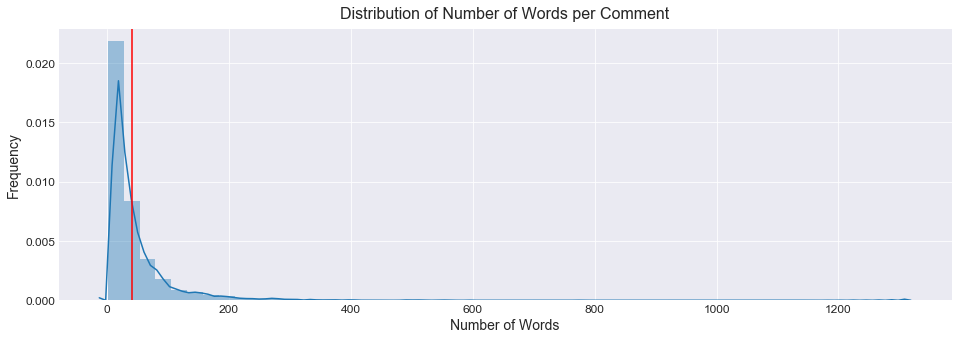

In [54]:
# Create distribution plot for num_words
plt.figure(figsize=(16,5))
plt.title('Distribution of Number of Words per Comment', size=16, pad=10)

sns.distplot(df['num_words'])
plt.axvline(df['num_words'].mean(), color='r', )

plt.xlabel('Number of Words', size=14)
plt.ylabel('Frequency', size=14)

plt.xticks(size=12)
plt.yticks(size=12);

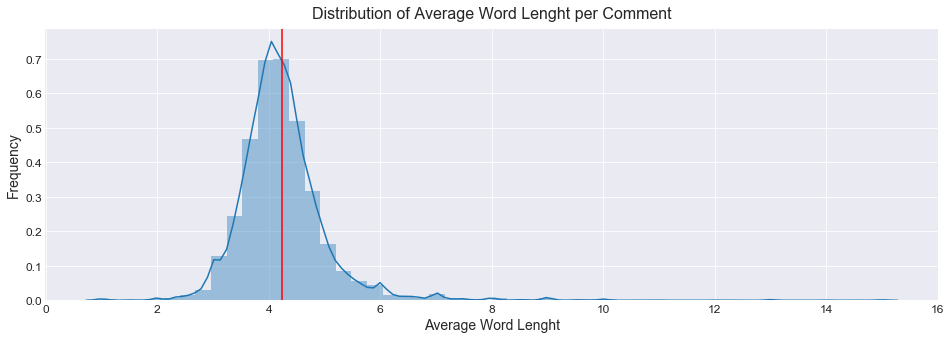

In [55]:
# Create distribution plot for Averege Word Lenght
plt.figure(figsize=(16,5))
plt.title('Distribution of Average Word Lenght per Comment', size=16, pad=10)

sns.distplot(df['avg_word_len'])
plt.axvline(df['avg_word_len'].mean(), color='r', )

plt.xlabel('Average Word Lenght', size=14)
plt.ylabel('Frequency', size=14)

plt.xticks(size=12)
plt.yticks(size=12);

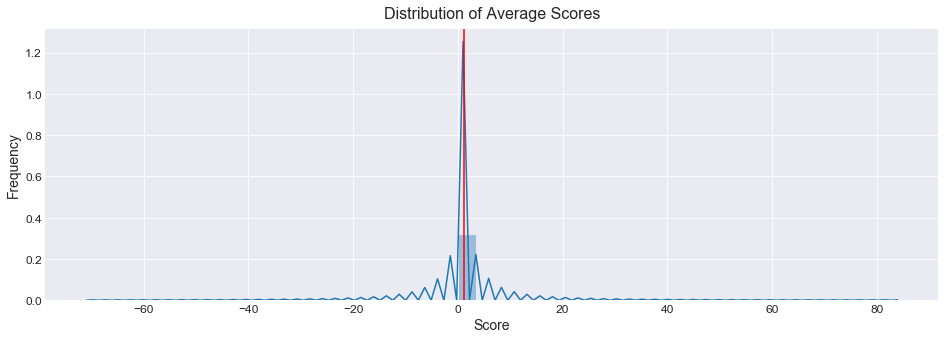

In [56]:
# Create distribution plot for score
plt.figure(figsize=(16,5))
plt.title('Distribution of Average Scores', size=16, pad=10)

sns.distplot(df['score'])
plt.axvline(df['score'].mean(), color='r', )

plt.xlabel('Score', size=14)
plt.ylabel('Frequency', size=14)

plt.xticks(size=12)
plt.yticks(size=12);

#### Save clean dataframe to be used to model

In [57]:
df.to_csv('./data/reddit_clean.csv', index_label=False)